## Outline
Kaggle Competitions
Titanic - Machine Learning from Disaster

In [7]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Collecting data

### Data dictionary
| Variable | Definition | Key
|---|:---:|---:|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number | 	 |
| fare | Passenger fare | 	 |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [2]:
# Get train data
train = pd.read_csv('data/train.csv')

### Exploration

In [3]:
#1. head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#2 check null
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#3. describe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#4. info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

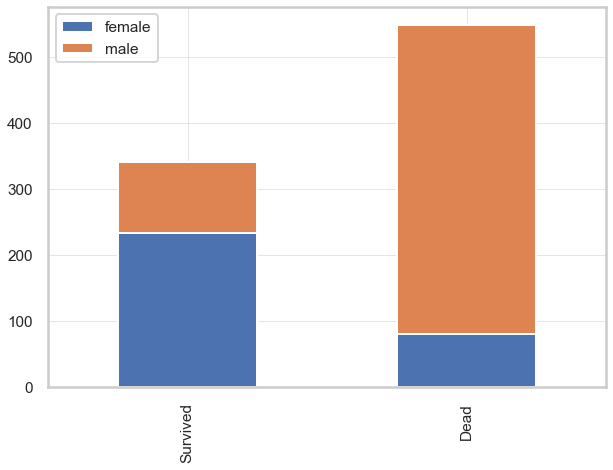

In [8]:
# Features - Sex
# 성별과 생존의 연관성
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 0.5})
feature = 'Sex'
survived = train[train['Survived'] == 1][feature].value_counts()
dead = train[train['Survived'] == 0][feature].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(10,7))

<AxesSubplot:>

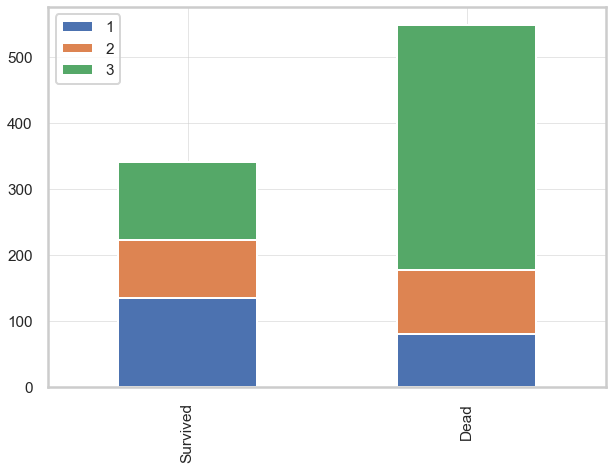

In [9]:
# Features - Pclass
# 티켓클래스과 생존의 연관성
# 1=1st, 2=2nd, 3=3rd
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 0.5})
feature = 'Pclass'
survived = train[train['Survived'] == 1][feature].value_counts()
dead = train[train['Survived'] == 0][feature].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(10,7))

<AxesSubplot:>

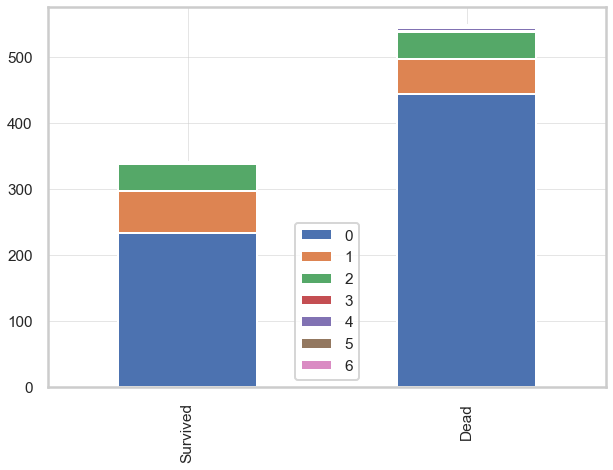

In [10]:
# Features - parch
# 동승한 부모/자녀의 수와 생존의 연관성
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 0.5})
feature = 'Parch'
survived = train[train['Survived'] == 1][feature].value_counts()
dead = train[train['Survived'] == 0][feature].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(10,7))

<AxesSubplot:>

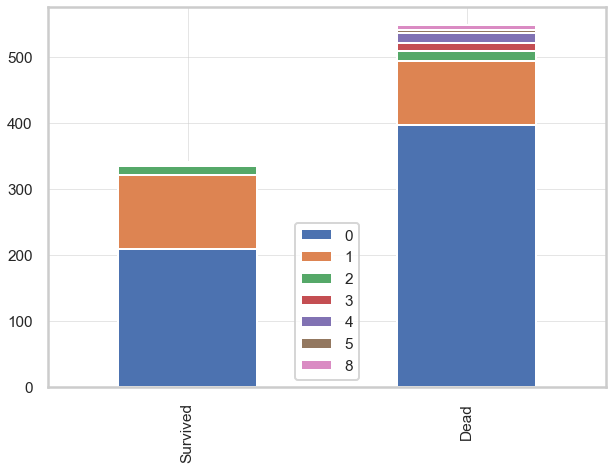

In [11]:
# Features - sibsp
# 동승한 형재/자매/배우자의 수와 생존의 연관성
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 0.5})
feature = 'SibSp'
survived = train[train['Survived'] == 1][feature].value_counts()
dead = train[train['Survived'] == 0][feature].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(10,7))

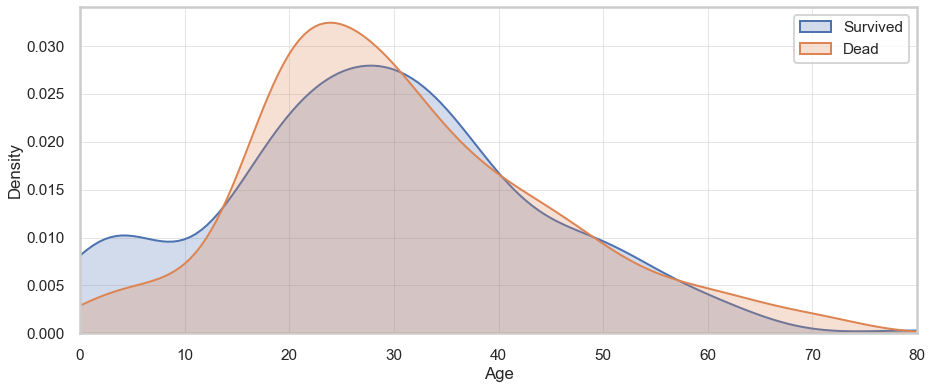

In [20]:
# Features - Age
# 연령대별 생존,사망 
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.7, rc={"grid.linewidth": 0.5})
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(train[train['Survived'] == 1]['Age'], shade=True, ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], shade=True, ax=ax)
plt.xlim(0, train['Age'].max())
plt.legend(['Survived', 'Dead'])
plt.show()